In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Task 2. (1 points) Data Loading

Requirement: Load the data using the 'pandas' module ( read_csv(....,sep=";") ), and show the first five rows. 

In [4]:
import pandas as pd
practice_csv = pd.read_csv('/content/drive/MyDrive/Data/final_practice.csv')
practice_csv.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Target_out
0,7.2,0.240,0.34,1.1,0.045,3.0,64.0,0.99130,3.23,0.51,11.4,5
1,5.7,0.255,0.65,1.2,0.079,17.0,137.0,0.99307,3.20,0.42,9.4,5
2,6.7,0.150,0.32,7.9,0.034,17.0,81.0,0.99512,3.29,0.31,10.0,6
3,9.2,0.230,0.30,1.1,0.031,40.0,99.0,0.99290,2.94,0.30,10.4,6
4,7.7,0.240,0.30,1.4,0.041,15.0,102.0,0.99290,3.26,0.53,10.4,6


## Task 3. (3 points) Data Inspection: Write codes for the following analysis

(1) check the data types in columns, 

(2) check if any missing values exist in the dataset,

(3) show the statistics for each column

In [ ]:
practice_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   4898 non-null   float64
 1   Feature_2   4898 non-null   float64
 2   Feature_3   4898 non-null   float64
 3   Feature_4   4898 non-null   float64
 4   Feature_5   4898 non-null   float64
 5   Feature_6   4898 non-null   float64
 6   Feature_7   4898 non-null   float64
 7   Feature_8   4898 non-null   float64
 8   Feature_9   4898 non-null   float64
 9   Feature_10  4898 non-null   float64
 10  Feature_11  4898 non-null   float64
 11  Target_out  4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## Task 4 (6 points) : Data Visualization: Write codes for the following analysis

(1) Check the correlation between variables, we can construct a correlation matrix using the Pearson Correlation Coefficient, and visualize the matrix. You can refer to the following sources for the visualization:

Calculate correlation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html (Links to an external site.)

Matrix visualization: https://matplotlib.org/stable/gallery/images_contours_and_fields/matshow.html#sphx-glr-gallery-images-contours-and-fields-matshow-py (Links to an external site.)

Question: Are there any highly correlated features in the data (either negative or positive correlation)? Provide the description in the notebook as well.

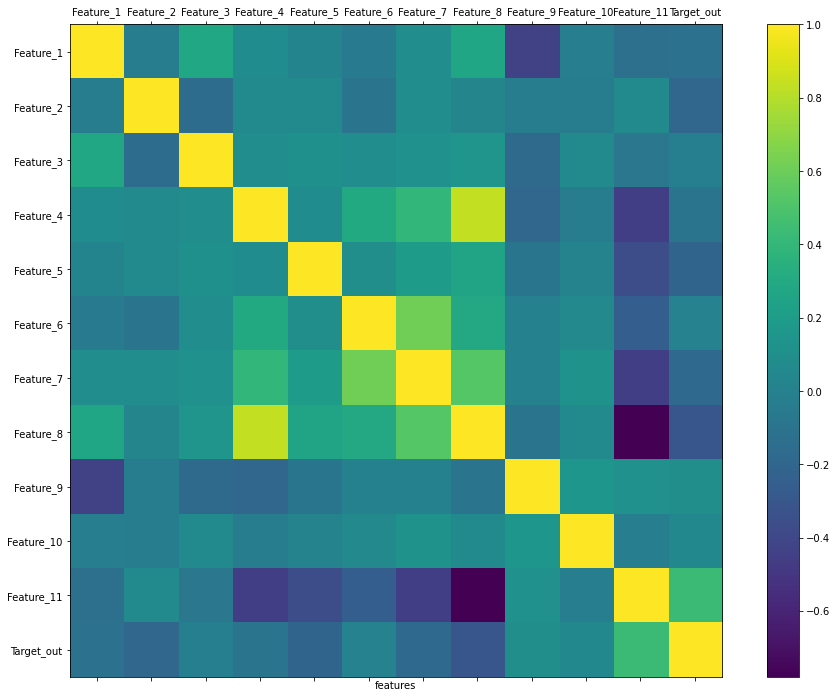

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = practice_csv.corr()

# a = np.diag(range(15))
fig = plt.figure(figsize=(16,12))

ax = fig.add_subplot(111) # main axes

caxes = ax.matshow(corr_matrix)
fig.colorbar(caxes)

ax.matshow(corr_matrix)

ax.set_xlabel('features')

ax.set_xticks(np.arange(0,12,1))
ax.set_xticklabels(practice_csv.columns)

ax.set_yticks(np.arange(0,12,1))
ax.set_yticklabels(practice_csv.columns)

# ax.legend()

# plt.colorbar(corr_matrix)

plt.show()


There appears to be strong correlation between feature 8 and feature 4. At the same there is evidence of strong non-correlation between feature 11 and feature 8

## (2) Use pandas method 'dataframe.boxplot()' to visualize the distribution of variables. Boxplot is also a good way to find outliers.

Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html (Links to an external site.) 

Question: Do we require feature scaling on this data? Which features should be taken care of? Provide an explanation in the notebook about why the feature scaling is required for this data.

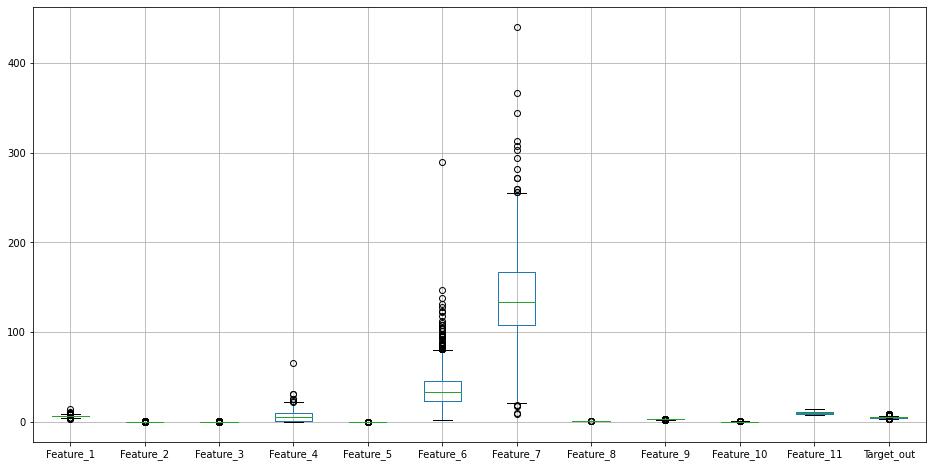

In [ ]:
practice_csv.boxplot(figsize=(16,8))

Yes. The data needs to be scaled because of obvious inequalities in interquartile ranges (IQR) between the different features contributing to the training of the model, as well as the presence of too many outliers in some of the features.

In particular, features 7 and 6 have wide Interquartile ranges and too many outliers where as most of the other features have very narrow interquatile ranges.

## (3) Visualize the histogram of the output variable using matplotlib library

Question: Do you think this data is balanced or imbalanced? Any suggestions to handle this imbalanced data? 

Reference codes:

for numeric: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html (Links to an external site.) 

for discrete: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html (Links to an external site.)
An example output:

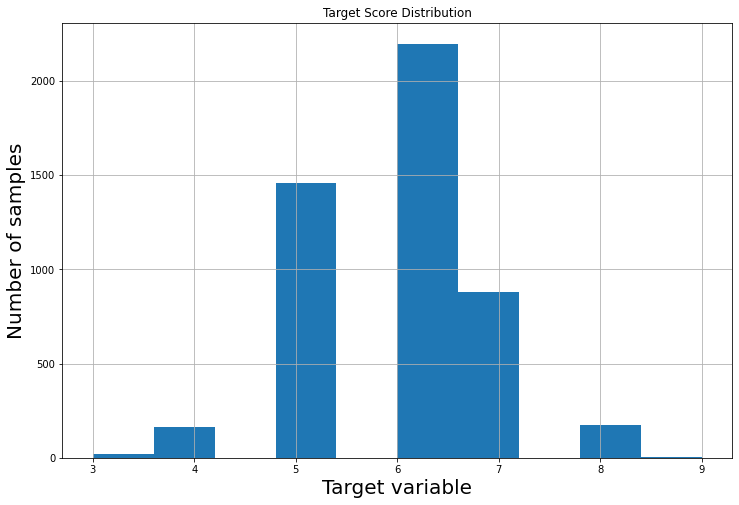

In [ ]:
#4a

%matplotlib inline
import matplotlib.pyplot as plt
practice_csv['Target_out'].hist(bins=10, figsize=(12,8))
plt.xlabel("Target variable",  fontsize=20)
plt.ylabel("Number of samples",  fontsize=20)
plt.title("Target Score Distribution")
plt.show()

The data is highly imbalanced, there are more instances for target variables between 6 and 7 while for some targets there are virtually none.

To handle the imbalance we can apply downsampling and upweighting. Downsampling means training on a disproportionately low subset of the majority class examples and upweighting involves adding an example weight to the downsampled class equal to the factor by which it was donwsampled.

We can also resample or collect more data

## Task 5:  (2 points) Dividing the dataset into separate training and test dataset

Requirement: Correctly set train and test data. In this work, you should randomly divide the dataset into a training dataset and a test dataset where the training dataset will contain 70% of the samples and the test dataset will contain 30% samples, respectively. 
 

In [6]:
import numpy as np
np.random.seed(10)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(practice_csv, 0.3)

train_set

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Target_out
3816,6.0,0.28,0.27,15.50,0.036,31.0,134.0,0.99408,3.19,0.44,13.0,7
4846,6.6,0.14,0.44,1.60,0.042,47.0,140.0,0.99300,3.32,0.51,10.2,6
4717,6.9,0.25,0.34,1.30,0.035,27.0,82.0,0.99045,3.18,0.44,12.2,6
1622,6.8,0.39,0.31,14.35,0.043,28.0,162.0,0.99880,3.17,0.54,9.1,5
1349,8.6,0.18,0.40,1.10,0.040,20.0,107.0,0.99230,2.94,0.32,10.2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1180,7.2,0.25,0.28,14.40,0.055,55.0,205.0,0.99860,3.12,0.38,9.0,7
3441,7.9,0.29,0.39,6.70,0.036,6.0,117.0,0.99380,3.12,0.42,10.7,5
1344,7.8,0.25,0.37,1.00,0.043,10.0,80.0,0.99128,3.08,0.38,11.4,5
4623,6.7,0.37,0.41,6.30,0.061,22.0,149.0,0.99530,3.16,0.47,9.6,6


In [ ]:
train_labels = train_set["Target_out"].copy() # get labels for output label Y
train_features = train_set.drop("Target_out", axis=1) # drop labels to get features X for training set
test_labels = test_set["Target_out"].copy() # get labels for output label Y
test_features = test_set.drop("Target_out", axis=1) # drop labels to get features X for training set


## Task6: (2 points) Perform Feature Scaling - Standardization on the dataset

Requirement:
(1) perform standardization (or Min-Max normalization) to rescale the features so that they'll have similar scales
Note: The mean and standard deviation must be derived from the training data only, and then use the estimated mean & std to rescale the training and test data. 
 
(2) After performing the feature scaling, visualize the data using boxplot again to examine the distribution of columns
Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() ## define the transformer
scaler.fit(train_features) ## call .fit() method to calculate the min and max value for each column in dataset
train_features_scaled = scaler.transform(train_features)

print("Min of each column: ",scaler.data_min_)
print("Max of each column: ",scaler.data_max_)

Min of each column:  [ 3.9      0.08     0.       0.6      0.012    3.      10.       0.98713
  2.72     0.23     8.4    ]
Max of each column:  [1.42000e+01 1.10000e+00 1.23000e+00 6.58000e+01 3.46000e-01 2.89000e+02
 4.40000e+02 1.03898e+00 3.82000e+00 1.08000e+00 1.40500e+01]


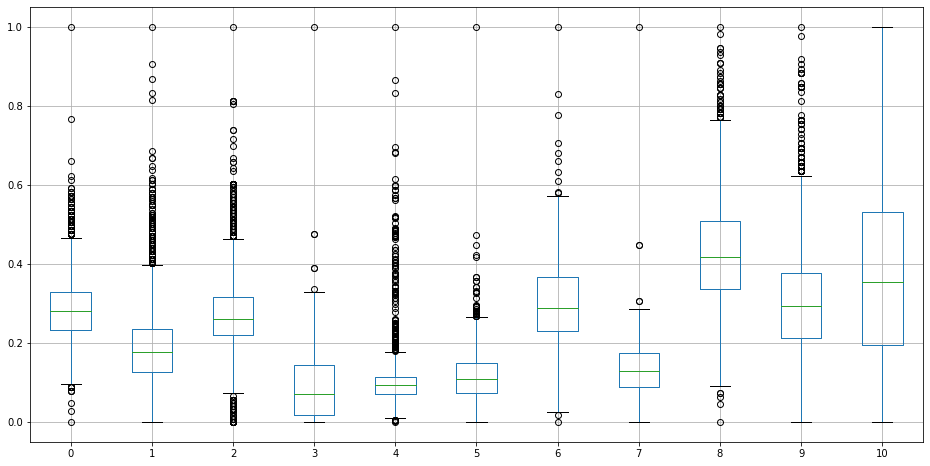

In [ ]:
pd.DataFrame(train_features_scaled).boxplot(figsize=(16,8))

## Task7: (2 points) Let's create a binary classification dataset by cutting the target values into two categories (<6, >=6)

In [7]:
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = practice_csv.drop(columns='Target_out')
targets = pd.DataFrame(practice_csv['Target_out'])
targets[targets<6] = 0
targets[targets>=6] = 1

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert y to one-dimensional array (vector)
y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)

y_train

X_train:  (3428, 11)
y_train:  (3428,)


array([0, 1, 1, ..., 1, 1, 1])

## Task 8: (60 points) Build several classification models. The example codes will be provided. You need to fit each machine learning model on the training data and make predictions on the test data. Before starting the coding, please review/read the corresponding sections in the textbook.

### (1) Task 8.1: Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html (Links to an external site.)

(6 points) Task 8.1.1:  Review chapter 4, P142-P145. Answer the following questions in your notebook

(1) Q1: Why does the logistic regression can be used for binary classification?

(2) Q2: What's the cost function for logistic regression to implement the binary classification

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty = 'l2', C = 1, random_state = 0,max_iter=100000)

logistic_model.fit(X_train,y_train)
logistic_model.predict(X_test)

array([0, 1, 1, ..., 0, 1, 1])

### (2) Task 8.2: Support Vector Machine: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html (Links to an external site.)

(6 points) Task 8.2.1:  Read chapter 5, P153-P161. Answer the following questions in your notebook

(1) Q1: What's the objective of SVM to find the optimal linear classifier (Chapter 5: P153)?

(2) Q2: What are available kernel functions for SVM to conduct linear and non-linear classification (Chapter 5: P154-P162)?

In [ ]:
from sklearn.svm import SVC
# define linear kernel, P156
svm_model_linear = SVC(C = 1.0, kernel='linear') 
svm_model_linear.fit(X_train,y_train)
svm_model_linear.predict(X_test)

# define polynomial kernel, P158
svm_model_polynomial = SVC(kernel = 'poly', degree = 3, C = 5 ) 
svm_model_polynomial.fit(X_train,y_train)
svm_model_polynomial.predict(X_test)


# define Gaussian RBF kernel, P160
svm_model_rbf = SVC(kernel = 'rbf', gamma = 5, C = 5 ) 
svm_model_rbf.fit(X_train,y_train)
svm_model_rbf.predict(X_test)

array([1, 1, 1, ..., 0, 1, 1])

**(1) Q1: What's the objective of SVM to find the optimal linear classifier (Chapter 5: P153)?**

The objective is to separate the classes but also fit the widest possible 'street' between the classes.

**(2) Q2: What are available kernel functions for SVM to conduct linear and non-linear classification (Chapter 5: P154-P162)?**

linear
poly
rbf
sigmoid


### (3) Decision Tree: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (Links to an external site.)

(6 points) Task 8.3.1:  Read chapter 6, P175-P182. Answer the following questions in your notebook

(1) Q1: Describe how the decision tree is constructed. How is each feature selected as a single node?  (Chapter 6: P179)?

(2) Q2: What are hyper-parameters available for decision tree? How to avoid overfitting in decision tree? (Chapter 6: P181-P182)?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth = None) # define tree model
decision_tree_model.fit(X_train,y_train)
decision_tree_model.predict(X_test)

array([0, 1, 1, ..., 0, 1, 1])

**(1) Q1: Describe how the decision tree is constructed. How is each feature selected as a single node?  (Chapter 6: P179)?**

A decision tree is constructed based off the attributes of the instances that a question can be asked about e.g. what is the color of the petals. The instances are sequentially split using their attributes until 'pure' samples are obtained e.g all flowers of size x petals, color y petals and length z sepals all belong to a specific class. Then max purity has been achieved. 

**(2) Q2: What are hyper-parameters available for decision tree? How to avoid overfitting in decision tree? (Chapter 6: P181-P182)?**

max_depth can be used to reduce Decision Tree's freedom during training.

min_samples_split specifies minimum number of samples a node must have before splitting.

min_samples_leaf/min_weight_fraction_leaf specifies min no of samples for a leaf

max_leaf_nodes

max_features specifies the total no of features to be explored

### (4) Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (Links to an external site.)

(6 points) Task 8.4.1:  Read chapter 7, P189-P200. Answer the following questions in your notebook

**(1) Q1: Describe how the ensemble learning works?  (Chapter 7: P189-190)**

Ensemble learning entails use of multiple classifiers whose individual predictions may not be much better than a random guess but when combined their aggregrate prediction is highly accurate

**(2) Q2: Describe the concepts behind bagging and random patches/subspaces (Chapter 7: P192-P196)?**

Bagging involves training the ensemble model using the same algorithm for each predictor but training each on a different subset of the dataset. The output becomes an average of sorts of their individual predictions

Random patches involves training the predictors on random subsets of the features of the dataset as well as random subsets of the datasets.



**(3) Q3: How does the feature importance work in Random Forest? (Chapter 7: P198-199**

Feature importance refers to a measure of how much a particular feature reduces impurity on average across all trees in the forest. 



In [8]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 100, max_leaf_nodes = 100)
random_forest_model.fit(X_train, y_train)
random_forest_model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])

### (5) K Nearest-neighbors: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance

knn_model = KNeighborsClassifier(n_neighbors = 3, metric = distance.minkowski)
knn_model.fit(X_train, y_train)
knn_model.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1])

### (6) Neural Network using keras:

(6 points) Task 8.6.1:  Review the steps in Week 10: class practice for neural network training to build the neural network models.  

In [ ]:
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

def build_neuralnet_classifier():
    model = Sequential()

    model.add(Dense(60,input_dim=11, activation='relu', kernel_regularizer='l2'))
    
    for i in range(5):
      # if i%2 == 0:
        # model.add(Dense(1000, activation = 'relu', kernel_regularizer='l2'))
      model.add(Dense(500,activation = 'relu', kernel_regularizer='l2'))
      # else:
      #   model.add(Dense(1000, activation = 'tanh', kernel_regularizer='l2'))

      model.add(BatchNormalization()) # add normalization here
      model.add(Dropout(0.2)) # add dropout here

    model.add(Dense(1, activation = 'softmax'))
    model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

    return model

X_val, X_test_reduced, y_val, y_test_reduced= train_test_split(X_test,y_test,test_size=0.5, shuffle = True, random_state = 8)

nn_model = build_neuralnet_classifier()
# nn_model.summary()
nn_model.fit(X_train, y_train,validation_data=(X_val,y_val),batch_size=5, callbacks=[keras_callbacks], epochs = 30)


Epoch 1/30
686/686 [==============================] - 14s 15ms/step - loss: 15.7118 - accuracy: 0.6689 - val_loss: 9.8011 - val_accuracy: 0.6544
Epoch 2/30
686/686 [==============================] - 7s 11ms/step - loss: 6.1107 - accuracy: 0.6689 - val_loss: 3.4908 - val_accuracy: 0.6544
Epoch 3/30
686/686 [==============================] - 7s 10ms/step - loss: 2.4130 - accuracy: 0.6689 - val_loss: 1.6271 - val_accuracy: 0.6544
Epoch 4/30
686/686 [==============================] - 7s 11ms/step - loss: 1.3497 - accuracy: 0.6689 - val_loss: 1.0240 - val_accuracy: 0.6544
Epoch 5/30
686/686 [==============================] - 7s 11ms/step - loss: 1.0278 - accuracy: 0.6689 - val_loss: 1.0280 - val_accuracy: 0.6544
Epoch 6/30
686/686 [==============================] - 7s 10ms/step - loss: 0.9354 - accuracy: 0.6689 - val_loss: 0.9990 - val_accuracy: 0.6544
Epoch 7/30
686/686 [==============================] - 7s 11ms/step - loss: 0.8036 - accuracy: 0.6689 - val_loss: 0.7537 - val_accuracy: 0.65

In [ ]:
nn_model.predict(X_test_reduced)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

## Task 10: (3 points) Define multiple evaluation metrics, calculate the performance on the test data set. Here we will use five metrics provided in sklearn. The following example is provided:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
# Make predictions and evaluate
logistic_pred = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_pred )
logistic_prec = precision_score(y_test, logistic_pred )
logistic_recall = recall_score(y_test, logistic_pred )
logistic_roc = roc_auc_score(y_test, logistic_pred )
logistic_f1 = f1_score(y_test, logistic_pred )

decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_acc = accuracy_score(y_test, decision_tree_pred )
decision_tree_prec = precision_score(y_test, decision_tree_pred )
decision_tree_recall = recall_score(y_test, decision_tree_pred )
decision_tree_roc = roc_auc_score(y_test, decision_tree_pred )
decision_tree_f1 = f1_score(y_test, decision_tree_pred )


knn_pred = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred )
knn_prec = precision_score(y_test, knn_pred )
knn_recall = recall_score(y_test, knn_pred )
knn_roc = roc_auc_score(y_test, knn_pred )
knn_f1 = f1_score(y_test, knn_pred )

random_forest_pred = random_forest_model.predict(X_test)
random_forest_acc = accuracy_score(y_test, random_forest_pred )
random_forest_prec = precision_score(y_test, random_forest_pred )
random_forest_recall = recall_score(y_test, random_forest_pred )
random_forest_roc = roc_auc_score(y_test, random_forest_pred )
random_forest_f1 = f1_score(y_test, random_forest_pred )


nn_pred = nn_model.predict(X_test)
nn_acc = accuracy_score(y_test, nn_pred )
nn_prec = precision_score(y_test, nn_pred )
nn_recall = recall_score(y_test, nn_pred )
nn_roc = roc_auc_score(y_test, nn_pred )
nn_f1 = f1_score(y_test, nn_pred )


svm_model_pred = svm_model_linear.predict(X_test)
svm_model_acc = accuracy_score(y_test, svm_model_pred )
svm_model_prec = precision_score(y_test, svm_model_pred )
svm_model_recall = recall_score(y_test, svm_model_pred )
svm_model_roc = roc_auc_score(y_test, svm_model_pred )
svm_model_f1 = f1_score(y_test, svm_model_pred )


In [ ]:
methods = ["Logistic Regression","KNN","Decision Tree","SVM","Random-Forest","Neural Network"]
accuracy_scores = [logistic_acc,knn_acc,decision_tree_acc,svm_model_acc,random_forest_acc,nn_acc] 
precision_scores = [logistic_prec,knn_prec,decision_tree_prec,svm_model_prec,random_forest_prec,nn_prec]
recall_scores = [logistic_recall,knn_recall,decision_tree_recall,svm_model_recall,random_forest_recall,nn_recall]
f1_scores = [logistic_roc,knn_roc,decision_tree_roc,svm_model_roc,random_forest_roc,nn_roc]
auc_scores = [logistic_f1,knn_f1,decision_tree_f1,svm_model_f1,random_forest_f1,nn_f1]

final_final_accuracy_report_ = pd.DataFrame({'Method':methods, 'Accuracy':accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, "F1-score": f1_scores, "AUC score" : auc_scores })
final_final_accuracy_report_

,Method,Accuracy,Precision,Recall,F1-score,AUC score
0,Logistic Regression,0.750340,0.771325,0.880829,0.690910,0.822448
1,KNN,0.761905,0.805970,0.839378,0.726620,0.822335
2,Decision Tree,0.763946,0.826638,0.810363,0.742805,0.818420
3,SVM,0.742177,0.764440,0.877720,0.680444,0.817173
4,Random-Forest,0.799320,0.823359,0.883938,0.760781,0.852574
5,Neural Network,0.656463,0.656463,1.000000,0.500000,0.792608


## **Task 11: (10 points) Perform 10-fold cross-validation and hyper-parameter tuning for all models.** You can get the best model from random search cross-validation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

### (1) Logistic regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


hyperparameter_set = {'C': [1,0.1,0.01,0.001,0.0001,0]}
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=100000)

grid_search = GridSearchCV(logistic_model, hyperparameter_set,cv=10)

logistic_fit = grid_search.fit(features,targets)
logistic_fit_results = pd.DataFrame(logistic_fit.cv_results_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
logistic_fit_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,1.614722,0.685283,0.003261,0.000199,1,{'C': 1},0.759184,0.738776,0.726531,0.728571,0.746939,0.755102,0.740816,0.753061,0.770961,0.744376,0.746432,0.013012,1
1,0.647789,0.166890,0.003489,0.000684,0.1,{'C': 0.1},0.736735,0.714286,0.700000,0.722449,0.726531,0.744898,0.726531,0.738776,0.740286,0.725971,0.727646,0.012802,2
2,0.337516,0.161194,0.003175,0.000167,0.01,{'C': 0.01},0.714286,0.681633,0.683673,0.702041,0.718367,0.716327,0.697959,0.720408,0.719836,0.715746,0.707028,0.014086,3
3,0.126103,0.025169,0.002950,0.000424,0.001,{'C': 0.001},0.685714,0.675510,0.665306,0.687755,0.667347,0.677551,0.661224,0.679592,0.685072,0.683027,0.676810,0.008836,4
4,0.080460,0.011486,0.003051,0.000821,0.0001,{'C': 0.0001},0.667347,0.659184,0.659184,0.657143,0.646939,0.675510,0.663265,0.669388,0.683027,0.670757,0.665174,0.009755,5
5,0.004472,0.000064,0.000000,0.000000,0,{'C': 0},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


### (3) Support Vector Machine: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
hyperparameter_set = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}
from sklearn.svm import SVC
svm = SVC()

grid_search = GridSearchCV(svm, hyperparameter_set, cv=10)

svm_fit = grid_search.fit(features,targets)
svm_fit_results = pd.DataFrame(svm_fit.cv_results_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [41]:
svm_fit_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.865083,0.032682,0.041807,0.004056,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
1,0.865100,0.013655,0.096759,0.001214,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
2,0.871748,0.040033,0.042333,0.004409,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
3,0.900586,0.010568,0.100055,0.003428,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
4,0.868565,0.036339,0.040889,0.000558,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
5,0.942454,0.009529,0.109131,0.004505,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
6,0.870456,0.042423,0.041390,0.001369,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
7,0.782425,0.011785,0.102120,0.005101,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26
8,1.077470,0.047305,0.040057,0.001104,0.01,0.001,linear,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}",0.716327,0.697959,...,0.700000,0.704082,0.708163,0.685714,0.730612,0.730061,0.721881,0.709480,0.014068,20
9,0.904311,0.016336,0.097433,0.001949,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.665306,0.665306,...,0.665306,0.665306,0.665306,0.665306,0.665306,0.664622,0.664622,0.665169,0.000274,26


### (3) Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [42]:
# Define the grid of hyperparameters to search
hyperparameter_set = {'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt']}
random_forest = RandomForestClassifier(random_state=60)

grid_search = GridSearchCV(random_forest, hyperparameter_set, cv=10)

random_forest_fit = grid_search.fit(X_train,y_train)
random_forest_fit_results = pd.DataFrame(random_forest_fit.cv_results_)


In [43]:
random_forest_fit_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.545336,0.068600,0.021035,0.004355,auto,100,"{'max_features': 'auto', 'n_estimators': 100}",0.795918,0.842566,0.827988,0.804665,0.827988,0.798834,0.827988,0.839650,0.827485,0.804094,0.819718,0.016304,7
1,1.041312,0.026283,0.040788,0.003582,auto,200,"{'max_features': 'auto', 'n_estimators': 200}",0.807580,0.833819,0.825073,0.816327,0.807580,0.795918,0.822157,0.845481,0.839181,0.812865,0.820598,0.014791,1
2,2.160502,0.732147,0.077646,0.030203,auto,300,"{'max_features': 'auto', 'n_estimators': 300}",0.801749,0.842566,0.827988,0.816327,0.807580,0.795918,0.819242,0.842566,0.836257,0.807018,0.819721,0.016111,5
3,2.137636,0.049662,0.076880,0.003569,auto,400,"{'max_features': 'auto', 'n_estimators': 400}",0.801749,0.842566,0.825073,0.813411,0.810496,0.795918,0.825073,0.845481,0.836257,0.809942,0.820597,0.016182,3
4,0.530512,0.027827,0.019565,0.001275,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.795918,0.842566,0.827988,0.804665,0.827988,0.798834,0.827988,0.839650,0.827485,0.804094,0.819718,0.016304,7
5,1.063164,0.020023,0.040632,0.002887,sqrt,200,"{'max_features': 'sqrt', 'n_estimators': 200}",0.807580,0.833819,0.825073,0.816327,0.807580,0.795918,0.822157,0.845481,0.839181,0.812865,0.820598,0.014791,1
6,1.791182,0.417969,0.060036,0.005108,sqrt,300,"{'max_features': 'sqrt', 'n_estimators': 300}",0.801749,0.842566,0.827988,0.816327,0.807580,0.795918,0.819242,0.842566,0.836257,0.807018,0.819721,0.016111,5
7,3.172482,0.785213,0.124727,0.039577,sqrt,400,"{'max_features': 'sqrt', 'n_estimators': 400}",0.801749,0.842566,0.825073,0.813411,0.810496,0.795918,0.825073,0.845481,0.836257,0.809942,0.820597,0.016182,3


### (4) K Nearest-neighbors : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [44]:
hyperparameter_set = {'n_neighbors': [1, 3, 5, 7, 9]}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, hyperparameter_set, n_jobs=5,cv=10)

knn_fit = grid_search.fit(X_train,y_train)
knn_fit_results = pd.DataFrame(knn_fit.cv_results_)

In [46]:
knn_fit_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012068,0.003132,0.099770,0.010340,1,{'n_neighbors': 1},0.766764,0.810496,0.775510,0.746356,0.766764,0.781341,0.778426,0.793003,0.809942,0.766082,0.779468,0.019218,1
1,0.010773,0.003918,0.117726,0.015638,3,{'n_neighbors': 3},0.740525,0.790087,0.752187,0.740525,0.746356,0.766764,0.734694,0.752187,0.804094,0.777778,0.760519,0.022172,2
2,0.008555,0.003608,0.121514,0.007249,5,{'n_neighbors': 5},0.743440,0.778426,0.766764,0.734694,0.734694,0.752187,0.734694,0.734694,0.801170,0.748538,0.752930,0.021468,4
3,0.009413,0.004274,0.130622,0.008292,7,{'n_neighbors': 7},0.746356,0.760933,0.749271,0.734694,0.760933,0.746356,0.740525,0.740525,0.795322,0.742690,0.751760,0.016603,5
4,0.011404,0.003965,0.125461,0.024220,9,{'n_neighbors': 9},0.752187,0.763848,0.749271,0.763848,0.749271,0.743440,0.734694,0.755102,0.809942,0.745614,0.756722,0.019629,3


from keras.wrappers.scikit_learn import KerasClassifier### (5) Neural Network using keras : https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ (Links to an external site.) 

try different number of layers: 1-layer, 2-layer, 3-layer
in each layer, try different number of neurons: 10, 20, 30, 40, 50 
you can use for loop to check each combination, and get the best model that performs best on validation set

In [50]:
from keras.wrappers.scikit_learn import KerasClassifier

def build_neuralnet_classifier(n_neurons = 10, n_layers=1):
    model = Sequential()

    model.add(Dense(60,input_dim=11, activation='relu', kernel_regularizer='l2'))
    
    for i in range(n_layers):
      model.add(Dense(n_neurons,activation = 'relu', kernel_regularizer='l2'))
      model.add(BatchNormalization()) # add normalization here
      model.add(Dropout(0.2)) # add dropout here

    model.add(Dense(1, activation = 'softmax'))
    model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])

    return model

hyperparameter_set={'n_neurons' : [10,20,30,40,50], 'n_layers': [1,2,3]}
# nn_model = build_neuralnet_classifier()
nn_model = KerasClassifier(build_fn=build_neuralnet_classifier, epochs=20, batch_size=10, verbose=0)

grid_search = GridSearchCV(nn_model, hyperparameter_set, cv=10)

nn_fit = grid_search.fit(X_train,y_train)
nn_fit_results = pd.DataFrame(nn_fit.cv_results_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
# Make predictions and evaluate
logistic_pred_ = logistic_fit.best_estimator_.predict(X_test)
logistic_acc_ = accuracy_score(y_test, logistic_pred_ )
logistic_prec_ = precision_score(y_test, logistic_pred_ )
logistic_recall_ = recall_score(y_test, logistic_pred_ )
logistic_roc_ = roc_auc_score(y_test, logistic_pred_ )
logistic_f1_ = f1_score(y_test, logistic_pred_ )

knn_pred_ = knn_fit.best_estimator_.predict(X_test)
knn_acc_ = accuracy_score(y_test, knn_pred_ )
knn_prec_ = precision_score(y_test, knn_pred_ )
knn_recall_ = recall_score(y_test, knn_pred_ )
knn_roc_ = roc_auc_score(y_test, knn_pred_ )
knn_f1_ = f1_score(y_test, knn_pred_ )

random_forest_pred_ = random_forest_fit.best_estimator_.predict(X_test)
random_forest_acc_ = accuracy_score(y_test, random_forest_pred_ )
random_forest_prec_ = precision_score(y_test, random_forest_pred_ )
random_forest_recall_ = recall_score(y_test, random_forest_pred_ )
random_forest_roc_ = roc_auc_score(y_test, random_forest_pred_ )
random_forest_f1_ = f1_score(y_test, random_forest_pred_ )


nn_pred_ = nn_fit.best_estimator_.predict(X_test)
nn_acc_ = accuracy_score(y_test, nn_pred_ )
nn_prec_ = precision_score(y_test, nn_pred_ )
nn_recall_ = recall_score(y_test, nn_pred_ )
nn_roc_ = roc_auc_score(y_test, nn_pred_ )
nn_f1_ = f1_score(y_test, nn_pred_ )


svm_model_pred_ = svm_fit.best_estimator_.predict(X_test)
svm_model_acc_ = accuracy_score(y_test, svm_model_pred_ )
svm_model_prec_ = precision_score(y_test, svm_model_pred_ )
svm_model_recall_ = recall_score(y_test, svm_model_pred_ )
svm_model_roc_ = roc_auc_score(y_test, svm_model_pred_ )
svm_model_f1_ = f1_score(y_test, svm_model_pred_ )


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [53]:
methods = ["Logistic Regression","KNN","SVM","Random-Forest","Neural Network"]
accuracy_scores = [logistic_acc_,knn_acc_,svm_model_acc_,random_forest_acc_,nn_acc_] 
precision_scores = [logistic_prec_,knn_prec_,svm_model_prec_,random_forest_prec_,nn_prec_]
recall_scores = [logistic_recall_,knn_recall_,svm_model_recall_,random_forest_recall_,nn_recall_]
f1_scores = [logistic_roc_,knn_roc_,svm_model_roc_,random_forest_roc_,nn_roc_]
auc_scores = [logistic_f1_,knn_f1_,svm_model_f1_,random_forest_f1_,nn_f1_]

final_final_accuracy_report = pd.DataFrame({'Method':methods, 'Accuracy':accuracy_scores, 'Precision': precision_scores, 'Recall': recall_scores, "F1-score": f1_scores, "AUC score" : auc_scores })
final_final_accuracy_report

,Method,Accuracy,Precision,Recall,F1-score,AUC score
0,Logistic Regression,0.368027,0.950000,0.039378,0.517709,0.075622
1,KNN,0.791156,0.837090,0.846632,0.765890,0.841834
2,SVM,0.656463,0.656463,1.000000,0.500000,0.792608
3,Random-Forest,0.834694,0.863179,0.889119,0.809906,0.875957
4,Neural Network,0.656463,0.656463,1.000000,0.500000,0.792608


## Task 12: (5 points) Perform model ensemble using the best models from Task 11 (Voting classifier , Chapter 7 P190).  You do not need to retrain the models. You can simply use each of the selected models to predict the label for the new test point and select the majority class for the final prediction

In [54]:
# log_prd = logistic_fit.best_estimator_.predict(X_test[2])

# knn_prd = knn_fit.best_estimator_.predict(X_test[2])

# rforest_prd = random_forest_fit.best_estimator_.predict(X_test[2])

# nn_prd = nn_fit.best_estimator_.predict(X_test[2])

# svm_prd_ = svm_fit.best_estimator_.predict(X_test[2])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [81]:
from scipy import stats
print("Logistic prediction: ", logistic_pred_[0], " KNN prediction: ", knn_pred_[0], " Random Forest prediction: ", random_forest_pred_[0], " nn prediction: ", nn_pred_[0][0], " svm: ", svm_model_pred_[0])
preds = np.array([logistic_pred_[0], random_forest_pred_[0], knn_pred_[0], nn_pred_[0][0],svm_model_pred_[0]])
print("Final: ", stats.mode(preds)[0][0], "Count: ", stats.mode(preds)[1][0])

Logistic prediction:  0  KNN prediction:  0  Random Forest prediction:  0  nn prediction:  1  svm:  1
Final:  0 Count:  3


In [21]:
random_forest = RandomForestClassifier(n_estimators =200, random_state=60)
random_forest.fit(X_train,y_train)
random_forest_importance = random_forest.feature_importances_
print(random_forest_importance)

[0.06810019 0.11719105 0.08175158 0.08022588 0.08229804 0.09724955
 0.08272523 0.11094433 0.07250921 0.06406676 0.1429382 ]


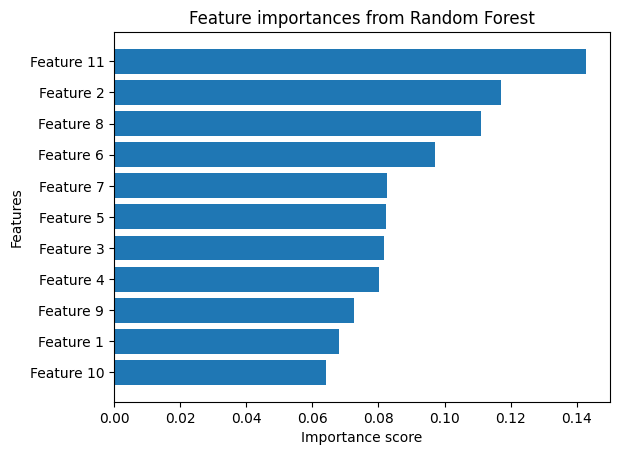

In [29]:
type(random_forest_importance)
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()
np.sort(random_forest_importance)

ax.barh(["Feature "+str(x+1) for x in np.argsort(random_forest_importance)],np.sort(random_forest_importance))
ax.set_title('Feature importances from Random Forest')
ax.set_ylabel('Features')
ax.set_xlabel('Importance score')


plt.show()